### Национальные чемпионы

In [1]:
from pfp_products import *
from pfp_optimization import *
from pfp_stat import *
import matplotlib.pyplot as plt

# set constants & assumbtions
n_scenarios = 10000
simulation_years = 10         #years

points_in_year = 12
assumptions = pd.DataFrame(index = {'SPX Index', 'NKY Index'}, data = {'return': [0.2, 0.1]} )

dates = np.arange(points_in_year - 1, points_in_year*5 +1, points_in_year)

#5 лет, барьер 50%, купон 8.4%, без памяти

mass_names = ['SBER RX EQUITY',
        'GAZP RX EQUITY',
        'GMKN RX EQUITY',
        'LKOH RX EQUITY',
        'MGNT RX EQUITY',
        'ROSN RX EQUITY',
        'ALRS RX EQUITY',
        'AFLT RX EQUITY',
        'MOEX RX EQUITY',
        'VTBR RX EQUITY']

mass_prices = ba_scenarios(mass_names, simulation_years, points_in_year, n_scenarios, assumptions, 0)
coupon_trigger = (mass_prices[dates,:,:] > 0.5).sum(axis = 2) == len(mass_names)
coupon = np.ones(coupon_trigger.shape).cumsum(axis = 0) == coupon_trigger.cumsum(axis = 0)
coupons = coupon.sum(axis = 0)

INDEXCF Index     0.082040
NKY Index         0.114892
SX5E Index        0.051918
CCMP Index        0.159190
SPX Index         0.107930
LEGATRUU Index    0.010780
US0012M Index     0.257230
usdeur curncy     0.017556
usdrub curncy     0.136070
usdaud curncy     0.062310
usdjpy curncy     0.026696
usdgbp curncy     0.021201
ERIXITEU Index    0.017626
ITRXAAE Index    -0.088228
ITRXAJE index    -0.135297
ITRXTE5I Index    0.015568
dtype: float64
[  1.28438468e+00   9.72299427e-02  -2.29840485e-01   1.07898378e-01
  -1.58364878e-01   4.17514249e-01   2.10213071e-02   4.10495046e-01
  -4.70248240e-01   2.04678461e-01  -4.44208052e-02   8.09476709e-02
   3.41083253e+01   1.29445694e-02   2.30472019e-02  -3.24185161e+01]
[  1.12946654e+00  -8.93216890e-02   2.07051052e-02  -4.16103095e-01
   3.97286086e-01  -4.53282009e-01   4.03349254e-02   1.88171266e-02
  -7.34291420e-02  -1.40128292e-01  -1.07413227e-01  -5.47781794e-02
  -1.44416029e+01   2.67208881e-03  -3.32834846e-02   1.43704905e+01]

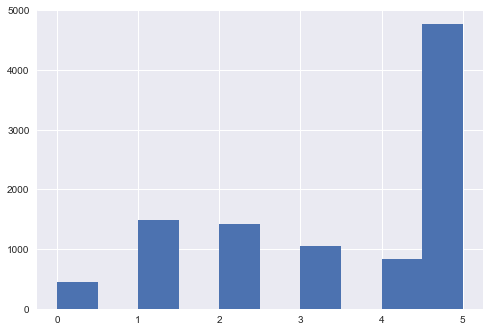

In [5]:
plt.hist(coupons, normed=False, bins=10)
plt.show()

In [10]:
np.unique(coupons, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 447, 1489, 1418, 1045,  831, 4770]))